# **Loan Default Prediction Dataset**

##### Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

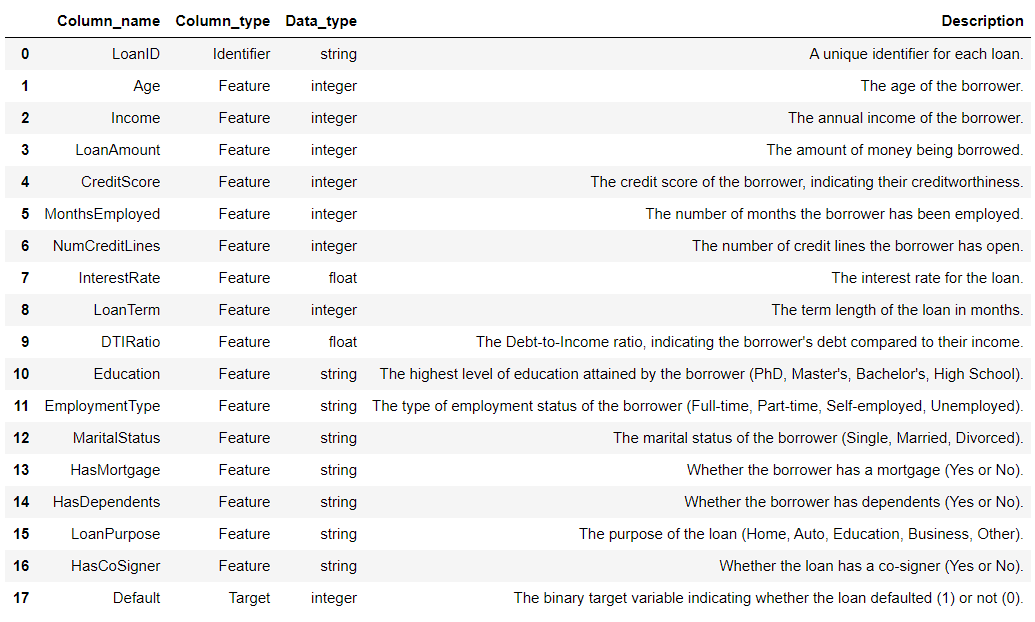

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Loan_default.csv')

In [3]:
new_df=df.head(5000)

In [4]:
new_df.shape

(5000, 18)

In [5]:
cols=new_df.columns

In [6]:
new_df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


##### Here’s an explanation of what each column likely represents, based on the context of loan applications:

1. **LoanID**: A unique identifier for each loan application or record.

2. **Age**: The age of the loan applicant, typically measured in years.

3. **Income**: The monthly or annual income of the applicant, often in the local currency.

4. **LoanAmount**: The amount of money being requested as a loan.

5. **CreditScore**: A numerical representation of the applicant’s creditworthiness, usually ranging from 300 to 850.

6. **MonthsEmployed**: The total number of months the applicant has been employed in their current or previous jobs.

7. **NumCreditLines**: The number of active or past credit lines (e.g., credit cards, loans) the applicant has.

8. **InterestRate**: The annual interest rate on the loan being offered or requested, expressed as a percentage.

9. **LoanTerm**: The duration of the loan repayment period, usually in months or years.

10. **DTIRatio** (Debt-to-Income Ratio): The proportion of the applicant’s income that goes toward paying debts, typically expressed as a percentage.

11. **Education**: The educational background of the applicant, which might be categorical (e.g., high school, bachelor’s, master’s).

12. **EmploymentType**: The type of employment of the applicant, such as full-time, part-time, self-employed, or unemployed.

13. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).

14. **HasMortgage**: A binary indicator (1/0 or True/False) showing whether the applicant has an existing mortgage.

15. **HasDependents**: A binary indicator showing whether the applicant has dependents (children or others relying on their income).

16. **LoanPurpose**: The stated purpose of the loan, such as for a car, home, education, or personal use.

17. **HasCoSigner**: A binary indicator showing whether the loan application includes a co-signer.

18. **Default**: Indicates whether the loan has defaulted or not (typically a binary value).  
   - **Default = 1**: Loan was **not repaid** as per terms (defaulted).  
   - **Default = 0**: Loan was **repaid** succation or by analyzing the data distribution.

In [7]:
new_df['CreditScore'].min()

300

In [8]:
new_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
for i in cols:
    a = new_df[i].duplicated().sum()
    print(i, a)


LoanID 0
Age 4948
Income 84
LoanAmount 63
CreditScore 4450
MonthsEmployed 4880
NumCreditLines 4996
InterestRate 2939
LoanTerm 4995
DTIRatio 4919
Education 4996
EmploymentType 4996
MaritalStatus 4997
HasMortgage 4998
HasDependents 4998
LoanPurpose 4995
HasCoSigner 4998
Default 4998


In [10]:
new_df.Education.unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [11]:
new_df.LoanPurpose.unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [12]:
new_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,82719.461200,128622.985600,575.63760,58.940800,2.49520,13.446358,36.261600,0.502016,0.117200
std,14.919094,39175.099642,70258.458052,158.14373,34.469942,1.12349,6.624348,17.040541,0.229123,0.321691
min,18.000000,15008.000000,5020.000000,300.00000,0.000000,1.00000,2.010000,12.000000,0.100000,0.000000
25%,31.000000,49105.000000,67769.750000,438.00000,28.000000,1.00000,7.667500,24.000000,0.310000,0.000000
50%,43.000000,82368.500000,129063.500000,578.00000,59.000000,2.00000,13.630000,36.000000,0.510000,0.000000
75%,56.000000,116683.250000,188894.500000,707.00000,88.000000,4.00000,19.192500,48.000000,0.700000,0.000000
max,69.000000,149975.000000,249863.000000,849.00000,119.000000,4.00000,25.000000,60.000000,0.900000,1.000000


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Income          5000 non-null   int64  
 3   LoanAmount      5000 non-null   int64  
 4   CreditScore     5000 non-null   int64  
 5   MonthsEmployed  5000 non-null   int64  
 6   NumCreditLines  5000 non-null   int64  
 7   InterestRate    5000 non-null   float64
 8   LoanTerm        5000 non-null   int64  
 9   DTIRatio        5000 non-null   float64
 10  Education       5000 non-null   object 
 11  EmploymentType  5000 non-null   object 
 12  MaritalStatus   5000 non-null   object 
 13  HasMortgage     5000 non-null   object 
 14  HasDependents   5000 non-null   object 
 15  LoanPurpose     5000 non-null   object 
 16  HasCoSigner     5000 non-null   object 
 17  Default         5000 non-null   i

## Exploratory Data Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
new_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

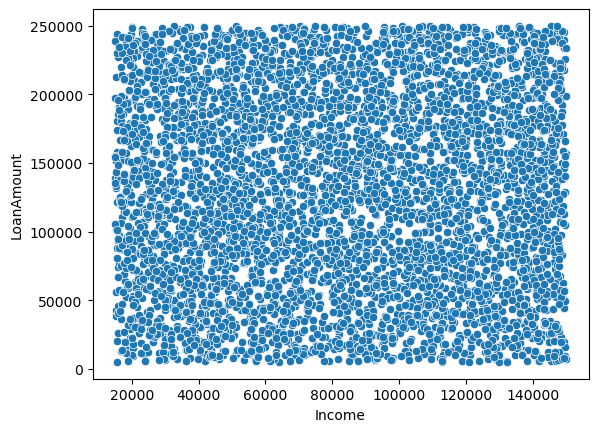

In [16]:
sns.scatterplot(x='Income', y='LoanAmount', data=new_df)
plt.show()

In [17]:
new_df[['Income', 'LoanAmount']].corr()


,Income,LoanAmount
Income,1.000000,0.008701
LoanAmount,0.008701,1.000000


<Axes: >

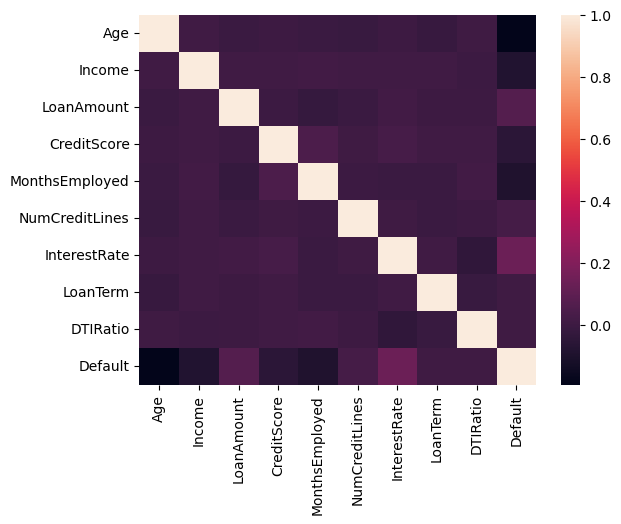

In [18]:
corr=new_df.corr(numeric_only=True)
sns.heatmap(corr)


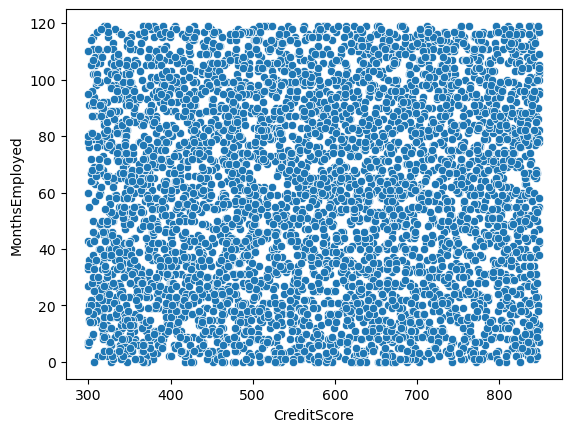

In [19]:
sns.scatterplot(x='CreditScore', y='MonthsEmployed', data=new_df)
plt.show()

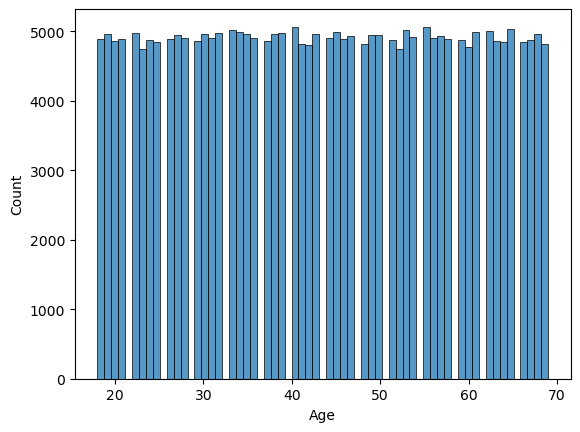

In [20]:
sns.histplot(df['Age'])
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'MonthsEmployed'}>,
        <Axes: title={'center': 'NumCreditLines'}>],
       [<Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'DTIRatio'}>],
       [<Axes: title={'center': 'Default'}>, <Axes: >, <Axes: >]],
      dtype=object)

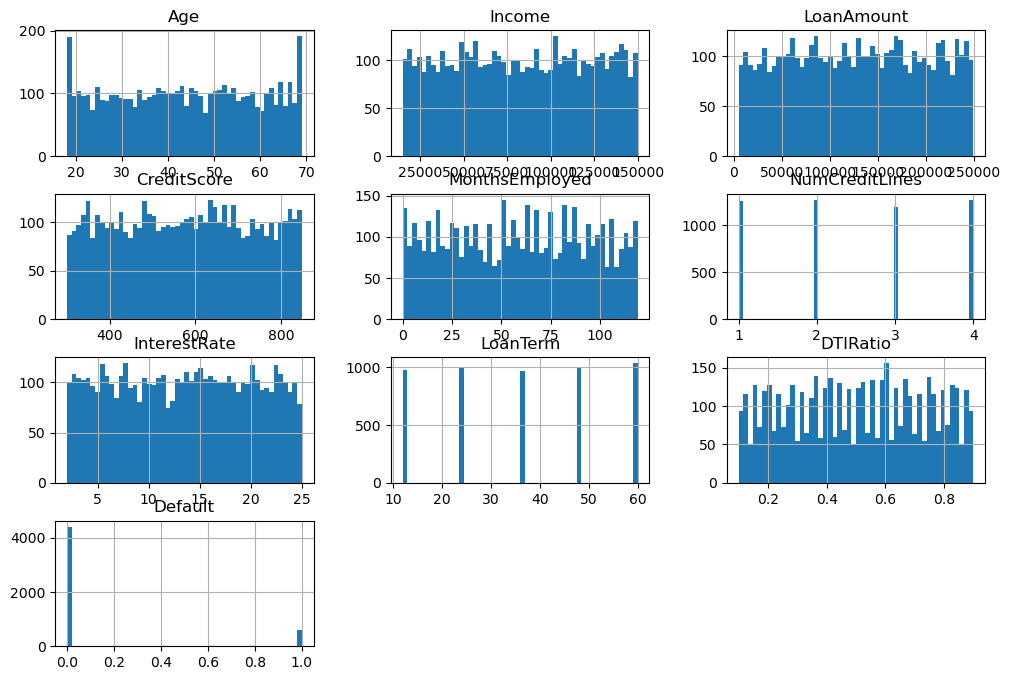

In [21]:
new_df.hist(bins=50,figsize=(12,8))

## Feature Engineering

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
x=new_df.drop(columns=['Default','LoanID'])
y=new_df['Default']
y

0       0
1       0
2       1
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Default, Length: 5000, dtype: int64

In [24]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
y_train.value_counts()

Default
0    3524
1     476
Name: count, dtype: int64

In [25]:
clf = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", 'PhD']]), ['Education']),
    ('tnf2', OneHotEncoder(drop='first', sparse=False), ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']),
    ('tnf3', StandardScaler(), ['Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'])
], remainder='passthrough')

In [26]:
X_train_trans=clf.fit_transform(X_train)
X_test_trans=clf.transform(X_test)
y_train.shape, y_test.shape

((4000,), (1000,))

In [27]:
from sklearn.linear_model import SGDClassifier


In [28]:
sgd= SGDClassifier(random_state=42)

In [29]:
sgd.fit(X_train_trans,y_train)

SGDClassifier(random_state=42)

In [30]:
y_pred=sgd.predict(X_test_trans)

In [31]:
accuracy= accuracy_score(y_test,y_pred)

In [32]:
accuracy

0.854

In [33]:
from sklearn.model_selection import cross_val_score


In [34]:
scores=cross_val_score(sgd,X_train_trans,y_train,cv=5,scoring='accuracy')
scores

array([0.8375 , 0.745  , 0.8825 , 0.85625, 0.7275 ])

In [35]:
new_df.Default.value_counts()

Default
0    4414
1     586
Name: count, dtype: int64

In [36]:
avg_score=scores.mean()
print('Average_Scores:',avg_score)



Average_Scores: 0.80975


In [37]:
from sklearn.metrics import classification_report
y_pred = sgd.predict(X_test_trans)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       890
           1       0.34      0.35      0.35       110

    accuracy                           0.85      1000
   macro avg       0.63      0.64      0.63      1000
weighted avg       0.86      0.85      0.86      1000



In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg= LogisticRegression()

In [40]:
logreg.fit(X_train_trans,y_train)

LogisticRegression()

In [41]:
y_pred=logreg.predict(X_test_trans)
y_pred_prob=logreg.predict_proba(X_test_trans)
y_pred_prob

array([[0.98024518, 0.01975482],
       [0.84734274, 0.15265726],
       [0.79176718, 0.20823282],
       ...,
       [0.67188272, 0.32811728],
       [0.9411886 , 0.0588114 ],
       [0.84993307, 0.15006693]])

In [42]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.889

In [43]:
logscores=cross_val_score(logreg,X_train_trans,y_train,cv=5,scoring='accuracy')
logscores

array([0.88375, 0.8825 , 0.88   , 0.885  , 0.8775 ])

In [44]:
avg_score=logscores.mean()
print('Average_Scores:',avg_score)



Average_Scores: 0.8817499999999999


In [45]:
from sklearn.metrics import classification_report
y_pred = sgd.predict(X_test_trans)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       890
           1       0.34      0.35      0.35       110

    accuracy                           0.85      1000
   macro avg       0.63      0.64      0.63      1000
weighted avg       0.86      0.85      0.86      1000



##### So far I have achieved 80% accuracy in SGDRegressor and 88% accuracy in LogisticRegression. But the precision recall result is not very satisfying and it might be due to imbalanced data. Lets fix this issue

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_trans, y_train)

In [48]:
y_train_smote.value_counts()

Default
0    3524
1    3524
Name: count, dtype: int64

In [49]:
logreg.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [50]:
y_pred= logreg.predict(X_test_trans)
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.678

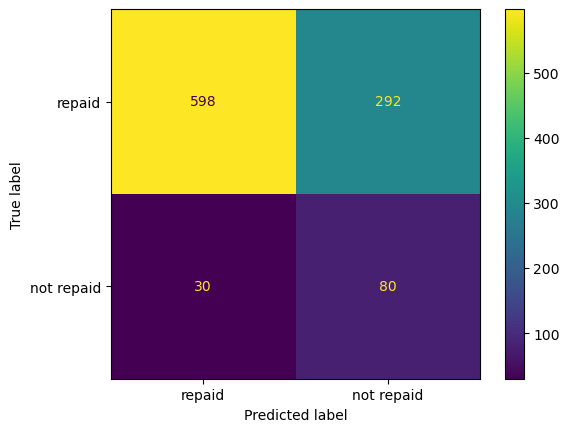

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

classes=logreg.classes_
cm= confusion_matrix(y_test,y_pred,labels= classes)
cm_disp=ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=['repaid','not repaid'])
cm_disp.plot()

In [52]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.67      0.79       890
           1       0.22      0.73      0.33       110

    accuracy                           0.68      1000
   macro avg       0.58      0.70      0.56      1000
weighted avg       0.87      0.68      0.74      1000



In [53]:
sgd.fit(X_train_smote,y_train_smote)

SGDClassifier(random_state=42)

In [54]:
y_pred= sgd.predict(X_test_trans)
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.505

In [55]:
y_pred = sgd.predict(X_test_trans)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.46      0.62       890
           1       0.17      0.89      0.28       110

    accuracy                           0.51      1000
   macro avg       0.57      0.67      0.45      1000
weighted avg       0.88      0.51      0.58      1000



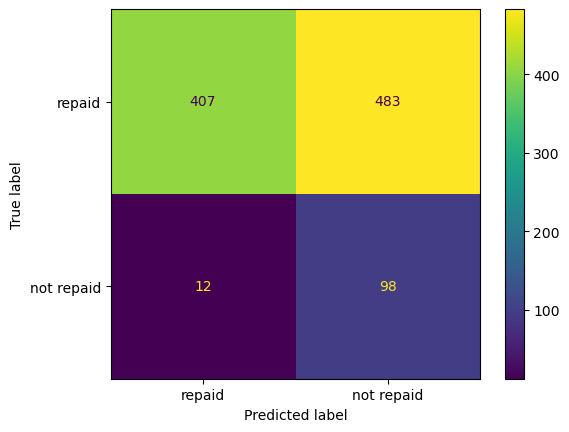

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

classes=sgd.classes_
cm= confusion_matrix(y_test,y_pred,labels= classes)
cm_disp=ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=['repaid','not repaid'])
cm_disp.plot()

In [57]:
from sklearn.model_selection import cross_val_predict

# Generate cross-validated predictions using the decision_function method
y = cross_val_predict(logreg, X_train_smote, y_train_smote, cv=3, method='decision_function')
y

array([-0.78668154,  1.613441  , -0.74544982, ..., -0.4559188 ,
       -0.28187064, -0.62783239])

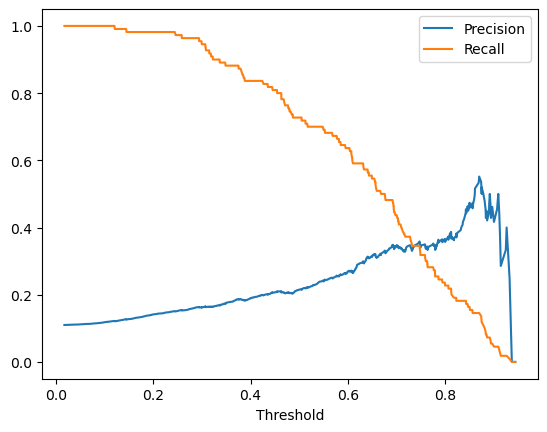

In [58]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = logreg.predict_proba(X_test_trans)[:, 1]



# Precision-recall thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve to identify the optimal threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()


In [59]:
import numpy as np

optimal_idx = np.argmax(recall>=0.80)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}")
print(f"Recall: {recall[optimal_idx]}")



Optimal Threshold: 0.0173311246714578
Precision: 0.11
Recall: 1.0


In [60]:
y_pred_custom = (y_probs >= optimal_threshold)


In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_custom)

0.5

In [62]:
accuracy = accuracy_score(y_test, y_pred_custom)
accuracy

0.11

In [63]:
print(classification_report(y_test,y_pred_custom))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       890
           1       0.11      1.00      0.20       110

    accuracy                           0.11      1000
   macro avg       0.06      0.50      0.10      1000
weighted avg       0.01      0.11      0.02      1000



In [64]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_custom)
precision

0.11

In [65]:
from sklearn.metrics import recall_score

recall= recall_score(y_test, y_pred_custom)
recall

1.0

In [66]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))
print(f"Precision: {precision:.2f}, Recall: {recall:.2f},  Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       890
           1       0.11      1.00      0.20       110

    accuracy                           0.11      1000
   macro avg       0.06      0.50      0.10      1000
weighted avg       0.01      0.11      0.02      1000

Precision: 0.11, Recall: 1.00,  Accuracy: 0.11


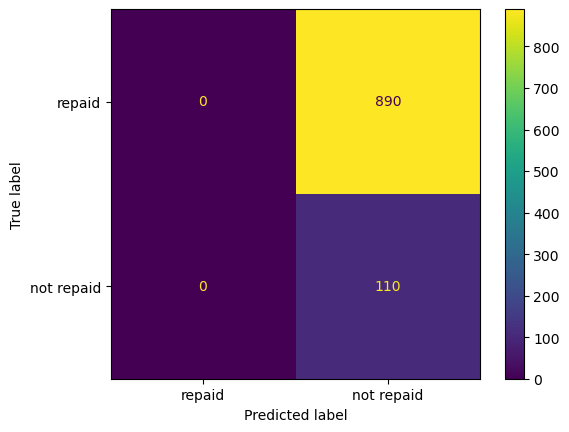

In [67]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

classes=logreg.classes_
cm= confusion_matrix(y_test,y_pred_custom,labels= classes)
cm_disp=ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=['repaid','not repaid'])
cm_disp.plot()

## Seems like the smoting resampling technique is not very useful, Lets try undersampling and oversampling

In [68]:
new_df.Default.value_counts()

Default
0    4414
1     586
Name: count, dtype: int64

In [69]:
under_df=df.copy()
under_df.shape

(255347, 18)

In [70]:
under_df=under_df.head(30000)
under_df.shape

(30000, 18)

In [71]:
count_0, count_1=under_df.Default.value_counts()
count_0, count_1

(26503, 3497)

In [72]:
df0= under_df[under_df['Default']==0]
df1= under_df[under_df['Default']==1]

In [73]:
new_df_0=df0.sample(count_1)

In [74]:
new_under_df= pd.concat([new_df_0,df1], axis=0)

In [75]:
new_under_df.Default.value_counts()

Default
0    3497
1    3497
Name: count, dtype: int64

In [76]:
x=new_under_df.drop(columns=['Default','LoanID'])
y=new_under_df['Default']

z=new_under_df['Default']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=z)
y_train.value_counts()

Default
1    2798
0    2797
Name: count, dtype: int64

In [77]:
clf = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", 'PhD']]), ['Education']),
    ('tnf2', OneHotEncoder(drop='first', sparse=False), ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']),
    ('tnf3', StandardScaler(), ['Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'])
], remainder='passthrough')

In [78]:
X_train_trans=clf.fit_transform(X_train)
X_test_trans=clf.transform(X_test)
y_train.shape, y_test.shape

((5595,), (1399,))

In [79]:
SGD= SGDClassifier(random_state=42)

In [80]:
SGD.fit(X_train_trans,y_train)
y_pred= SGD.predict(X_test_trans)
accuracy_score(y_pred,y_test)

0.5911365260900643

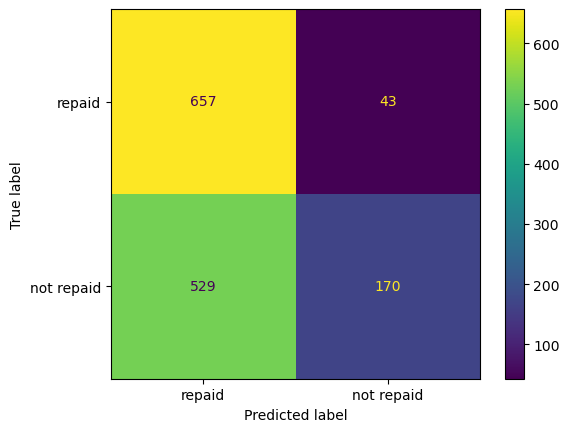

In [81]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

classes=SGD.classes_
cm= confusion_matrix(y_test,y_pred,labels= classes)
cm_disp=ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=['repaid','not repaid'])
cm_disp.plot()

In [82]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.55      0.94      0.70       700
           1       0.80      0.24      0.37       699

    accuracy                           0.59      1399
   macro avg       0.68      0.59      0.53      1399
weighted avg       0.68      0.59      0.53      1399



In [83]:
recall_score(y_test,y_pred)

0.24320457796852646

In [84]:
precision_score(y_test,y_pred)

0.7981220657276995

#### applying logistic regression model

In [85]:
logisticreg= LogisticRegression(max_iter=1000,random_state=42)

In [86]:
logisticreg.fit(X_train_trans,y_train)
y_pred= logisticreg.predict(X_test_trans)

accuracy_score(y_pred,y_test)


0.6876340243030736

In [87]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.69      0.68      0.68       700
           1       0.68      0.70      0.69       699

    accuracy                           0.69      1399
   macro avg       0.69      0.69      0.69      1399
weighted avg       0.69      0.69      0.69      1399



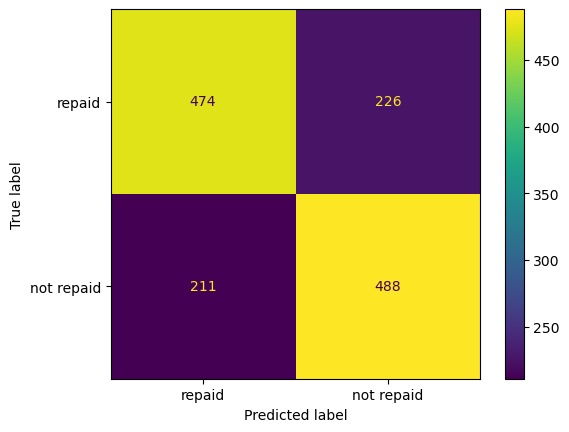

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

classes=logisticreg.classes_
cm= confusion_matrix(y_test,y_pred,labels= classes)
cm_disp=ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=['repaid','not repaid'])
cm_disp.plot()

In [89]:
c=[0.1,1,1.5,2,2.5]

for i in c:
    logisticreg= LogisticRegression(max_iter=1000,random_state=42,penalty='l2',C=i)
    logisticreg.fit(X_train_trans,y_train)
    y_pred= logisticreg.predict(X_test_trans)

    score=accuracy_score(y_pred,y_test)
    prec=precision_score(y_pred,y_test)
    rec=recall_score(y_pred,y_test)
    print(f'{i}, Accuracy: {score}, Precision: {prec}, Recall: {rec}')

0.1, Accuracy: 0.6876340243030736, Precision: 0.698140200286123, Recall: 0.6834733893557423
1, Accuracy: 0.6876340243030736, Precision: 0.698140200286123, Recall: 0.6834733893557423
1.5, Accuracy: 0.688348820586133, Precision: 0.698140200286123, Recall: 0.6844319775596073
2, Accuracy: 0.688348820586133, Precision: 0.698140200286123, Recall: 0.6844319775596073
2.5, Accuracy: 0.688348820586133, Precision: 0.698140200286123, Recall: 0.6844319775596073


In [90]:
c=[0.1,1,1.5,2,2.5]

for i in c:
    logisticreg= LogisticRegression(max_iter=1000,random_state=42,penalty='l1',C=i, solver='liblinear')
    logisticreg.fit(X_train_trans,y_train)
    y_pred= logisticreg.predict(X_test_trans)

    score=accuracy_score(y_pred,y_test)
    prec=precision_score(y_pred,y_test)
    rec=recall_score(y_pred,y_test)
    print(f'{i}, Accuracy: {score}, Precision: {prec}, Recall: {rec}')

0.1, Accuracy: 0.6926375982844889, Precision: 0.698140200286123, Recall: 0.6902404526166902
1, Accuracy: 0.6890636168691923, Precision: 0.6952789699570815, Recall: 0.6864406779661016
1.5, Accuracy: 0.6869192280200143, Precision: 0.6952789699570815, Recall: 0.6835443037974683
2, Accuracy: 0.6876340243030736, Precision: 0.6967095851216023, Recall: 0.6839887640449438
2.5, Accuracy: 0.688348820586133, Precision: 0.698140200286123, Recall: 0.6844319775596073


In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, penalty='l2'),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_trans, y_train)
print("Best parameter (C):", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameter (C): {'C': 0.01}
Best cross-validation accuracy: 0.6748882931188562


In [92]:
print('hey')

hey


### Lets try to apply SVM with a non-Linear kernal RBF

In [93]:
from sklearn.svm import SVC

In [94]:
svm= SVC(kernel='rbf')
svm.fit(X_train_trans,y_train)
y_pred= svm.predict(X_test_trans)

score=accuracy_score(y_pred,y_test)
prec=precision_score(y_pred,y_test)
rec=recall_score(y_pred,y_test)
print(f' Accuracy: {score}, Precision: {prec}, Recall: {rec}')

 Accuracy: 0.6647605432451751, Precision: 0.6809728183118741, Recall: 0.6592797783933518


In [95]:
svm= SVC(kernel='linear')
svm.fit(X_train_trans,y_train)
y_pred= svm.predict(X_test_trans)

score=accuracy_score(y_pred,y_test)
prec=precision_score(y_pred,y_test)
rec=recall_score(y_pred,y_test)
print(f' Accuracy: {score}, Precision: {prec}, Recall: {rec}')

 Accuracy: 0.6876340243030736, Precision: 0.6995708154506438, Recall: 0.6829608938547486


In [96]:
kernels = ['rbf', 'linear', 'sigmoid', 'poly']

param_grid = {'kernel': kernels, 'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(),param_grid,
                            cv=5, scoring='accuracy')
grid_search.fit(X_train_trans, y_train)
print("Best parameter (C):", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameter (C): {'C': 100, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.6759606791778373
